In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Directory containing CSV files
data_directory = 'certificate_data'

# List all CSV files in the directory
csv_files = [f for f in os.listdir(data_directory) if f.endswith('.csv')]

# Load and combine all CSV files
combined_data = pd.concat([pd.read_csv(os.path.join(data_directory, file)) for file in csv_files], ignore_index=True)

# Filter out only successful certificates
success_data = combined_data[combined_data['Status'] == 'Success']

# Save the filtered data to a new CSV (optional)
success_data.to_csv(os.path.join(data_directory, 'successful_certificates.csv'), index=False)


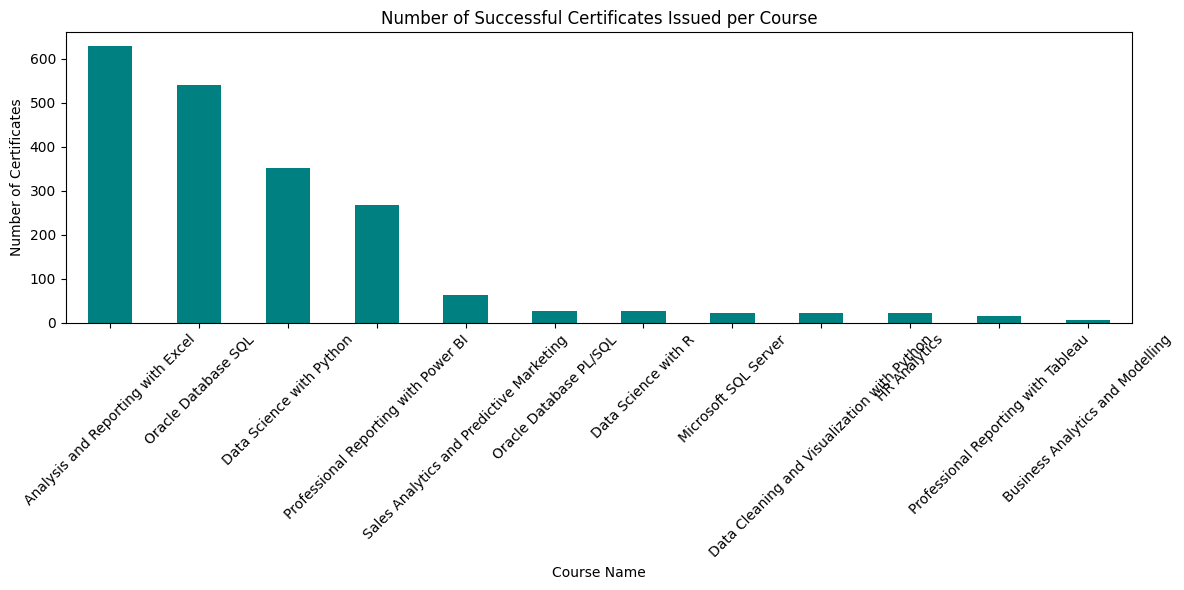

In [3]:

# Plot 1: Number of Successful Certificates Issued per Course
plt.figure(figsize=(12, 6))
success_course_counts = success_data['Course Name'].value_counts()
success_course_counts.plot(kind='bar', color='teal')
plt.title('Number of Successful Certificates Issued per Course')
plt.xlabel('Course Name')
plt.ylabel('Number of Certificates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(data_directory, 'successful_certificates_per_course.png'))
plt.show()


/var/folders/pc/6rmkz3b536l1k66dbrhqbl2r0000gn/T/ipykernel_99367/2515488454.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  success_data['Completion Date'] = pd.to_datetime(success_data['Completion Date'], errors='coerce')
/var/folders/pc/6rmkz3b536l1k66dbrhqbl2r0000gn/T/ipykernel_99367/2515488454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  success_data['Completion Date'] = pd.to_datetime(success_data['Completion Date'], errors='coerce')


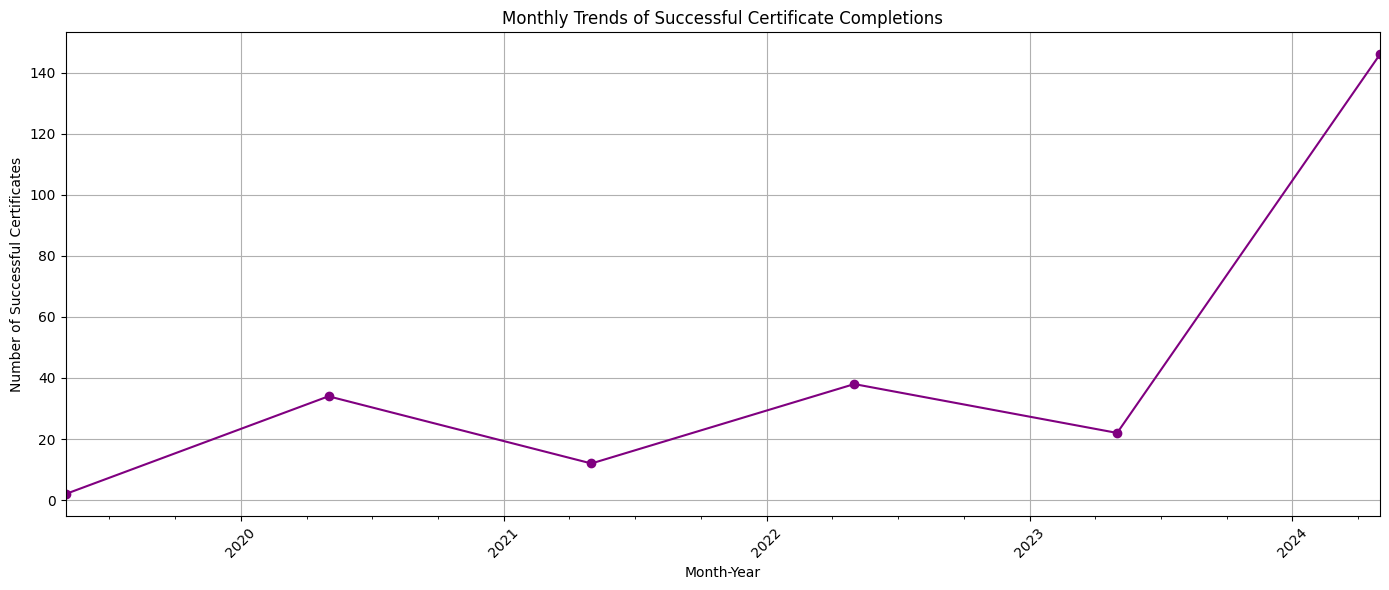

In [4]:

# Plot 2: Monthly Trends of Successful Completions
success_data['Completion Date'] = pd.to_datetime(success_data['Completion Date'], errors='coerce')
monthly_trends = success_data.groupby(success_data['Completion Date'].dt.to_period('M')).size()

plt.figure(figsize=(14, 6))
monthly_trends.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Trends of Successful Certificate Completions')
plt.xlabel('Month-Year')
plt.ylabel('Number of Successful Certificates')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(data_directory, 'monthly_trends_successful_completions.png'))
plt.show()




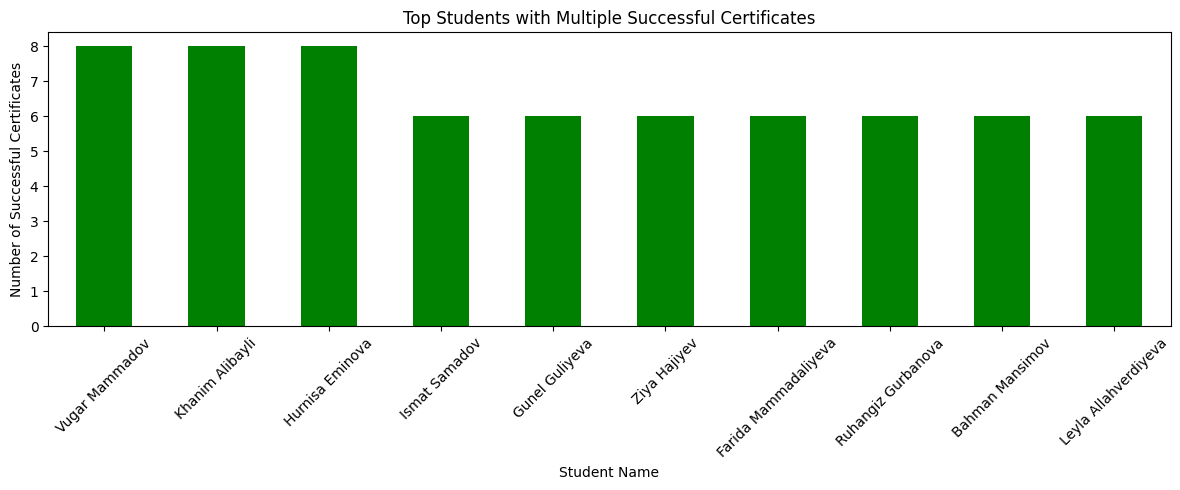

In [5]:
# Plot 3: Top Students with Multiple Successful Certificates
top_students = success_data['Student Name'].value_counts()
top_students_multiple = top_students[top_students > 1].head(10)  # Top 10 students with more than 1 certificate

plt.figure(figsize=(12, 5))
top_students_multiple.plot(kind='bar', color='green')
plt.title('Top Students with Multiple Successful Certificates')
plt.xlabel('Student Name')
plt.ylabel('Number of Successful Certificates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(data_directory, 'top_students_multiple_certificates.png'))
plt.show()



/var/folders/pc/6rmkz3b536l1k66dbrhqbl2r0000gn/T/ipykernel_99367/931777992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  success_data['Duration (Months)'] = pd.to_numeric(duration_mapping[0], errors='coerce')


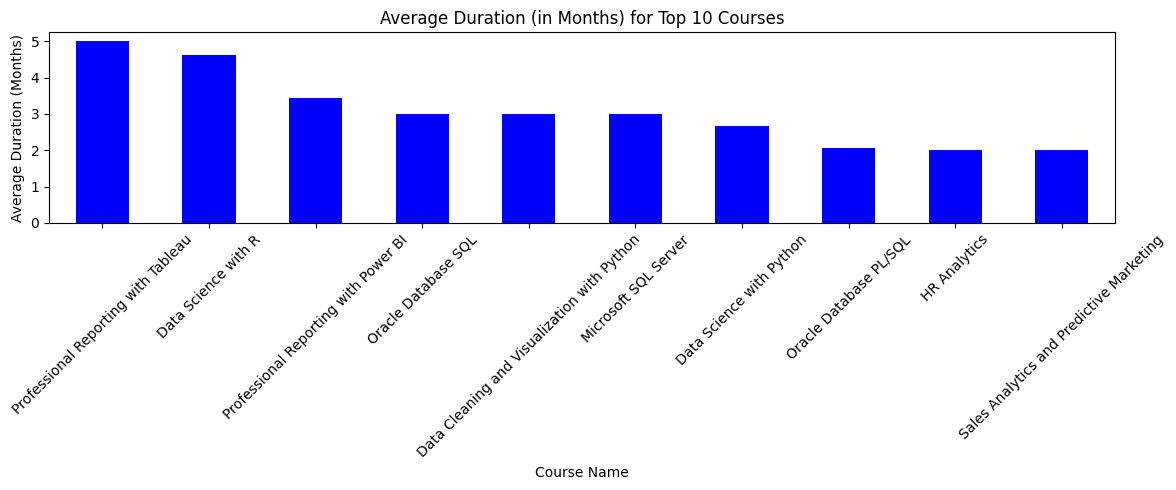

In [6]:
# Plot 4: Average Duration (in Months) for Top 10 Courses
duration_mapping = success_data['Duration'].str.extract(r'(\d+)\s*months?')
success_data['Duration (Months)'] = pd.to_numeric(duration_mapping[0], errors='coerce')
avg_duration_per_course = success_data.groupby('Course Name')['Duration (Months)'].mean().sort_values(ascending=False).dropna().head(10)

plt.figure(figsize=(12, 5))
avg_duration_per_course.plot(kind='bar', color='blue')
plt.title('Average Duration (in Months) for Top 10 Courses')
plt.xlabel('Course Name')
plt.ylabel('Average Duration (Months)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(data_directory, 'average_duration_per_course.png'))
plt.show()

/var/folders/pc/6rmkz3b536l1k66dbrhqbl2r0000gn/T/ipykernel_99367/1623172755.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  success_data['Year'] = success_data['Completion Date'].dt.year  # Extract year


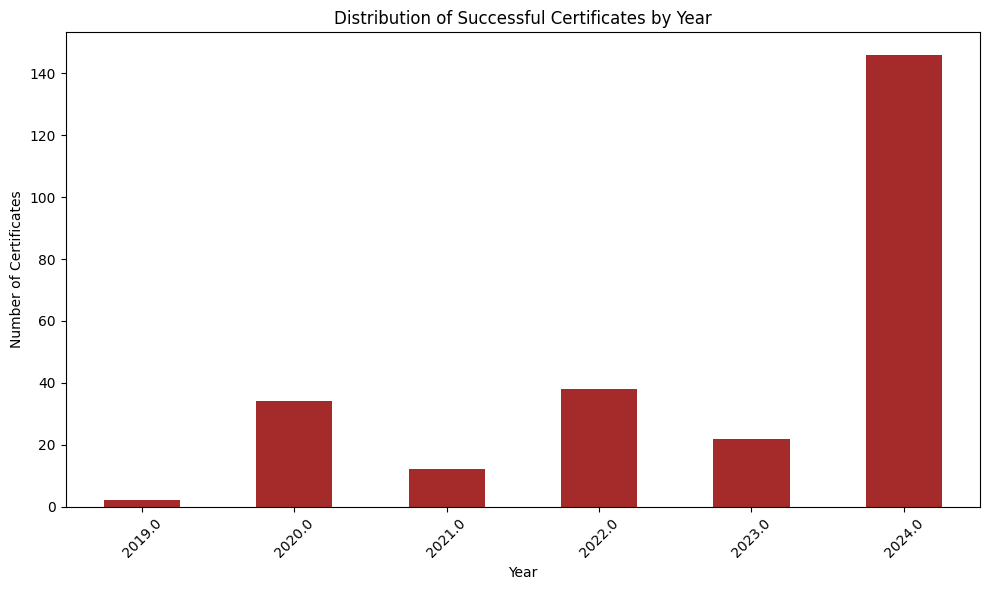

In [7]:
# Plot 5: Distribution of Certificates by Year
plt.figure(figsize=(10, 6))
success_data['Year'] = success_data['Completion Date'].dt.year  # Extract year
yearly_distribution = success_data['Year'].value_counts().sort_index()
yearly_distribution.plot(kind='bar', color='brown')
plt.title('Distribution of Successful Certificates by Year')
plt.xlabel('Year')
plt.ylabel('Number of Certificates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(data_directory, 'distribution_by_year.png'))
plt.show()



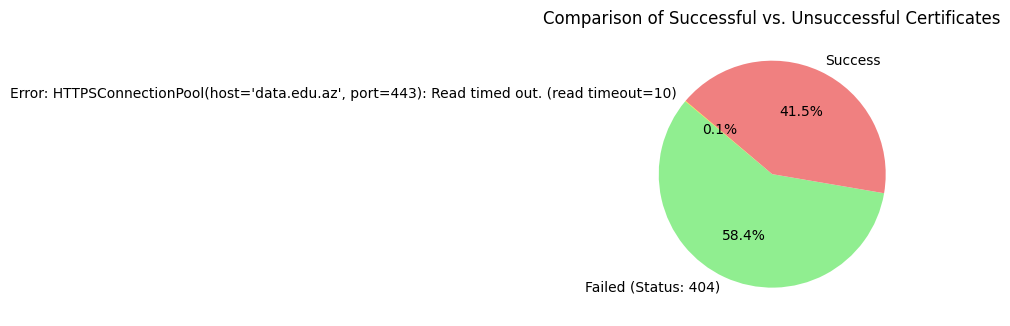

In [8]:

# Plot 6: Comparison of Successful vs Unsuccessful Certificates
status_counts = combined_data['Status'].value_counts()
plt.figure(figsize=(8, 5))
status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral', 'gold'])
plt.title('Comparison of Successful vs. Unsuccessful Certificates')
plt.ylabel('')  # Hide y-label
plt.tight_layout()
plt.savefig(os.path.join(data_directory, 'success_vs_unsuccessful_comparison.png'))
plt.show()



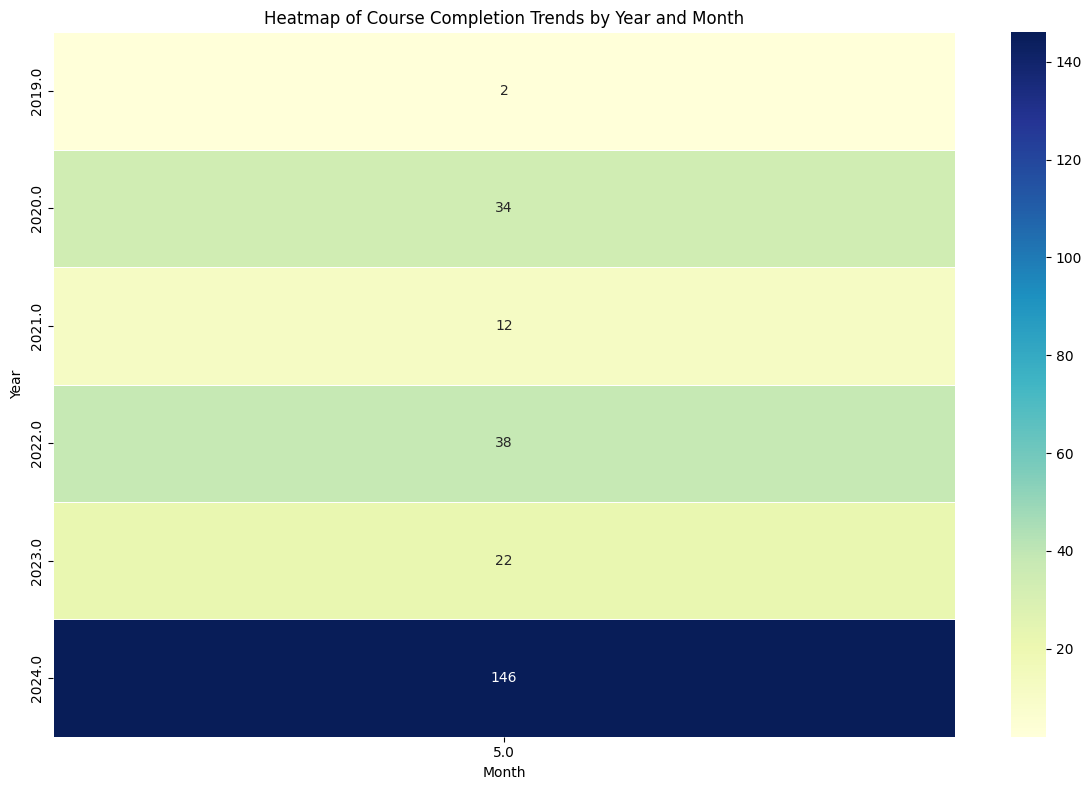

In [13]:
# Plot 7: Heatmap of Course Completion Trends by Year and Month
import seaborn as sns

heatmap_data = success_data.pivot_table(index=success_data['Completion Date'].dt.year,
                                        columns=success_data['Completion Date'].dt.month,
                                        values='Certificate ID', aggfunc='count').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=.5)
plt.title('Heatmap of Course Completion Trends by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.savefig(os.path.join(data_directory, 'heatmap_completion_trends.png'))
plt.show()

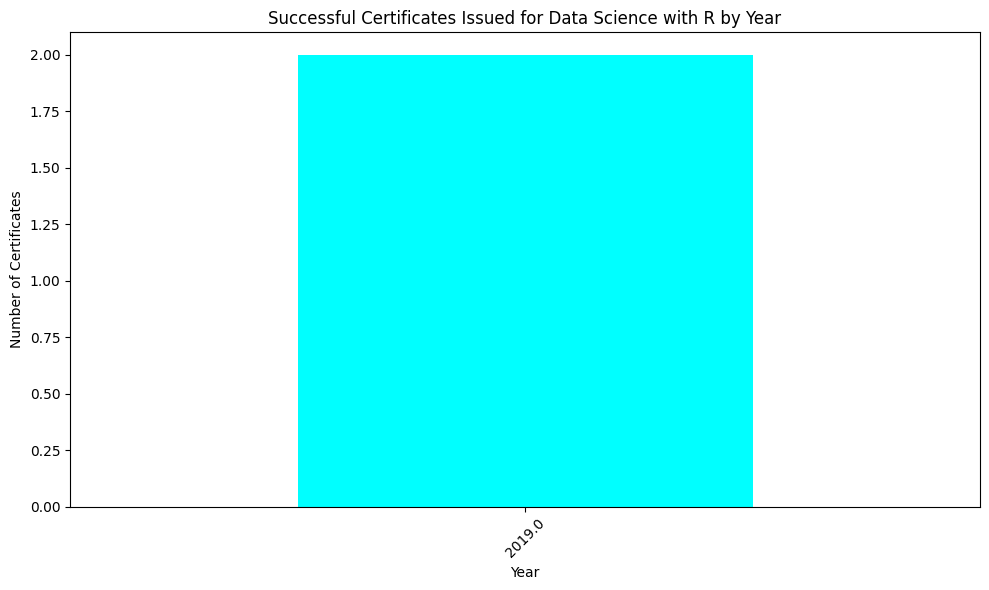

In [14]:
# Filter 1: Analysis of a Specific Course (Example: 'Data Science with R')
specific_course = 'Data Science with R'
course_data = success_data[success_data['Course Name'] == specific_course]

plt.figure(figsize=(10, 6))
course_data['Completion Date'].dt.year.value_counts().sort_index().plot(kind='bar', color='cyan')
plt.title(f'Successful Certificates Issued for {specific_course} by Year')
plt.xlabel('Year')
plt.ylabel('Number of Certificates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(data_directory, 'specific_course_analysis.png'))
plt.show()


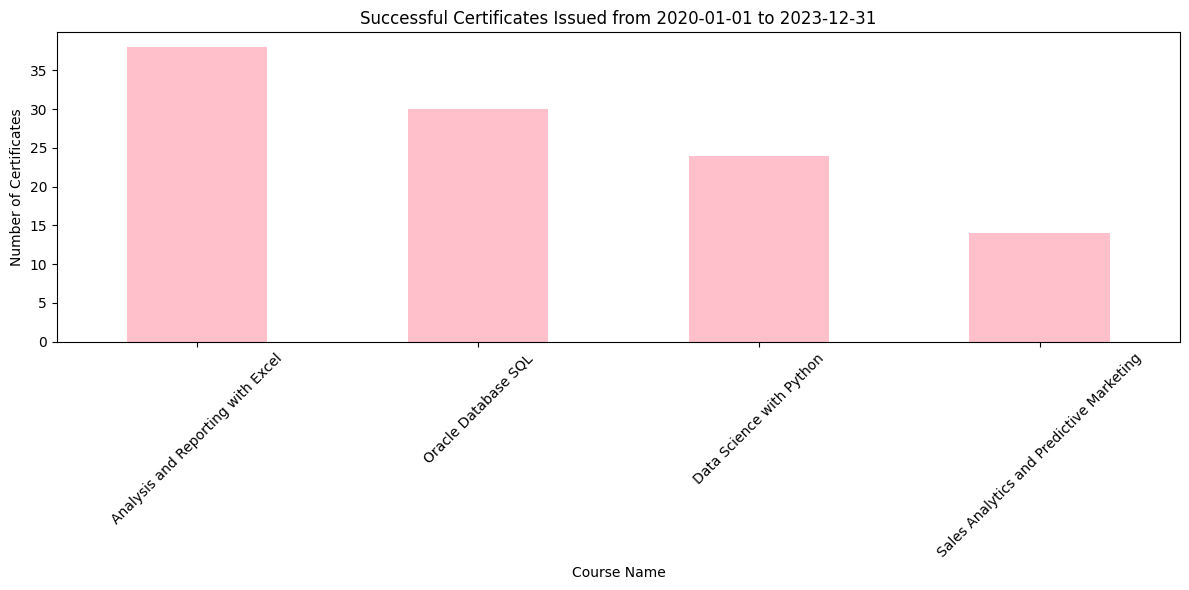

In [15]:

# Filter 2: Filter by Date Range (Example: 2020 to 2023)
start_date = '2020-01-01'
end_date = '2023-12-31'
date_filtered_data = success_data[(success_data['Completion Date'] >= pd.to_datetime(start_date)) &
                                  (success_data['Completion Date'] <= pd.to_datetime(end_date))]

plt.figure(figsize=(12, 6))
date_filtered_data['Course Name'].value_counts().plot(kind='bar', color='pink')
plt.title(f'Successful Certificates Issued from {start_date} to {end_date}')
plt.xlabel('Course Name')
plt.ylabel('Number of Certificates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(data_directory, 'date_filtered_analysis.png'))
plt.show()


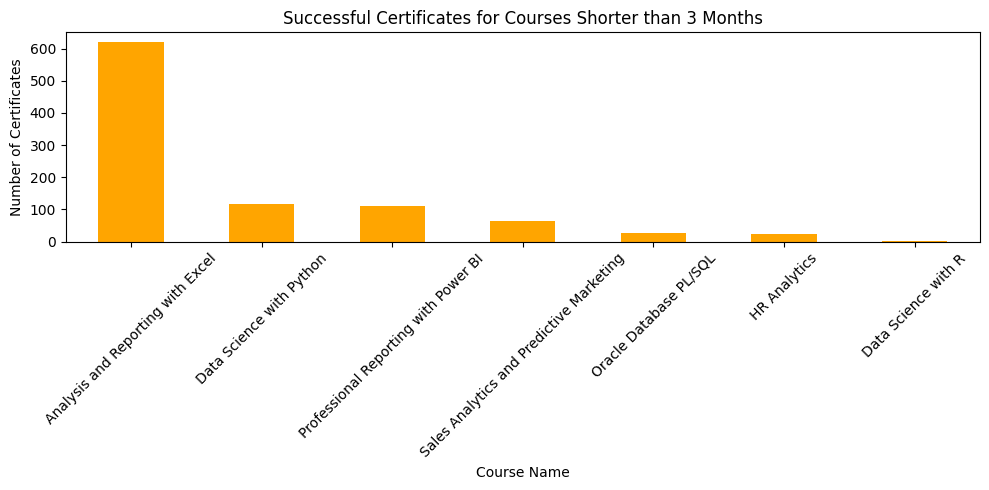

In [16]:
# Filter 3: Analysis by Duration (Example: Courses shorter than 3 months)
short_courses = success_data[success_data['Duration (Months)'] < 3]

plt.figure(figsize=(10, 5))
short_courses['Course Name'].value_counts().plot(kind='bar', color='orange')
plt.title('Successful Certificates for Courses Shorter than 3 Months')
plt.xlabel('Course Name')
plt.ylabel('Number of Certificates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(data_directory, 'short_courses_analysis.png'))
plt.show()

